In [1]:
import matplotlib.pyplot as plt
import yaml
import torch
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.size'] = 25

In [2]:
with open('stats/temp.yaml', 'r') as f:
    stats = yaml.load(f.read())
stats = pd.DataFrame.from_dict(stats)

/dataheart/kuntai_recovery/envs/diff/lib/python3.7/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


In [3]:
raw_stats = stats

In [41]:
# stats = raw_stats.copy()
# stats = stats[stats['input']  == "/dataheart/dataset/downtown/downtown_0/part%d.mp4"]
# stats = stats[stats['second']  < 6]
# stats = stats.groupby(['qpidx','residx', 'bframebiasidx']).mean().reset_index()
# shift_idx = 62
# shifted_stats = stats.copy()
# for key in ['qpidx', 'residx', 'bframebiasidx', 'f1', 'inference_sigmoid', 'inference_sum']:
#     shifted_stats[key] -= shifted_stats.iloc[62][key]

# dqp = shifted_stats[(shifted_stats.qpidx == 1) & (shifted_stats.residx == 0) & (shifted_stats.bframebiasidx == 0)].iloc[0]['inference_sigmoid']
# dres = shifted_stats[(shifted_stats.qpidx == 0) & (shifted_stats.residx == 1) & (shifted_stats.bframebiasidx == 0)].iloc[0]['inference_sigmoid']
# dbf = shifted_stats[(shifted_stats.qpidx == 0) & (shifted_stats.residx == 0) & (shifted_stats.bframebiasidx == 1)].iloc[0]['inference_sigmoid']

# shifted_stats['dacc'] = shifted_stats['qpidx'] * dqp + shifted_stats['residx'] * dres + shifted_stats['bframebiasidx'] * dbf


AttributeError: 'Figure' object has no attribute 'supxlabel'

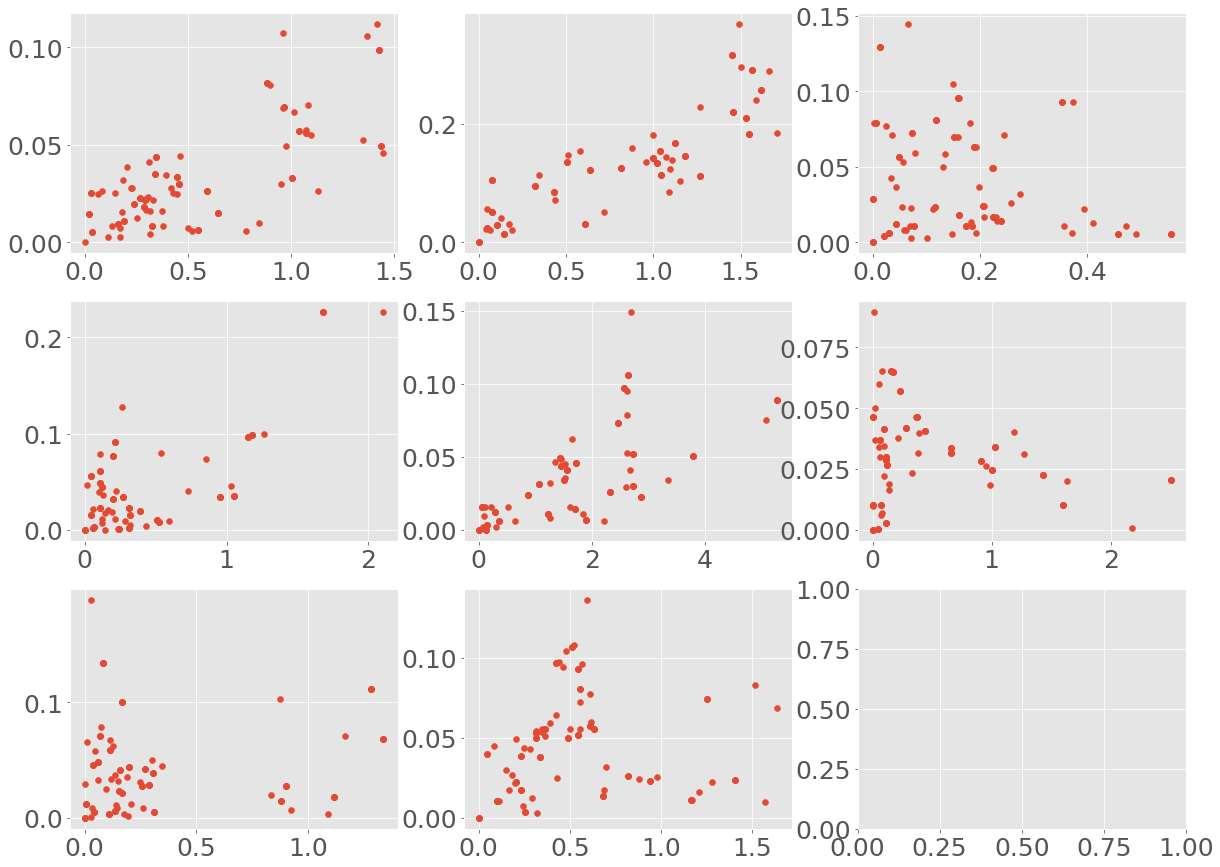

In [54]:
fig, ax = plt.subplots(3,3,figsize=(20, 15))

r = 2

for i in range(3):
    for j in range(3):
        if (i,j)==(2,2):
            continue
        stats = raw_stats.copy()
        stats = stats[stats['input']  == f"/dataheart/dataset/downtown/downtown_{i*3+j+1}/part%d.mp4"]
        stats = stats[stats['second']  < 6]
        stats = stats.groupby(['qpidx','residx', 'bframebiasidx']).mean().reset_index()
        shift_idx = 62
        shifted_stats = stats.copy()
        for key in ['qpidx', 'residx', 'bframebiasidx', 'f1', 'inference_sigmoid', 'inference_sum']:
            shifted_stats[key] -= shifted_stats.iloc[62][key]
        shifted_stats = shifted_stats[(shifted_stats.qpidx.abs() <= 2) & (shifted_stats.residx.abs() <= 2) & (shifted_stats.bframebiasidx.abs() <= 2)]
        ax[i,j].scatter(shifted_stats['inference_sigmoid'].abs().tolist(), shifted_stats['f1'].abs().tolist())

fig.supxlabel('Inference result change (abs)')
fig.supylabel('Accuracy change (abs)')
        # ax[i,j].set_xlabel()
        # ax[i,j].set_ylabel()

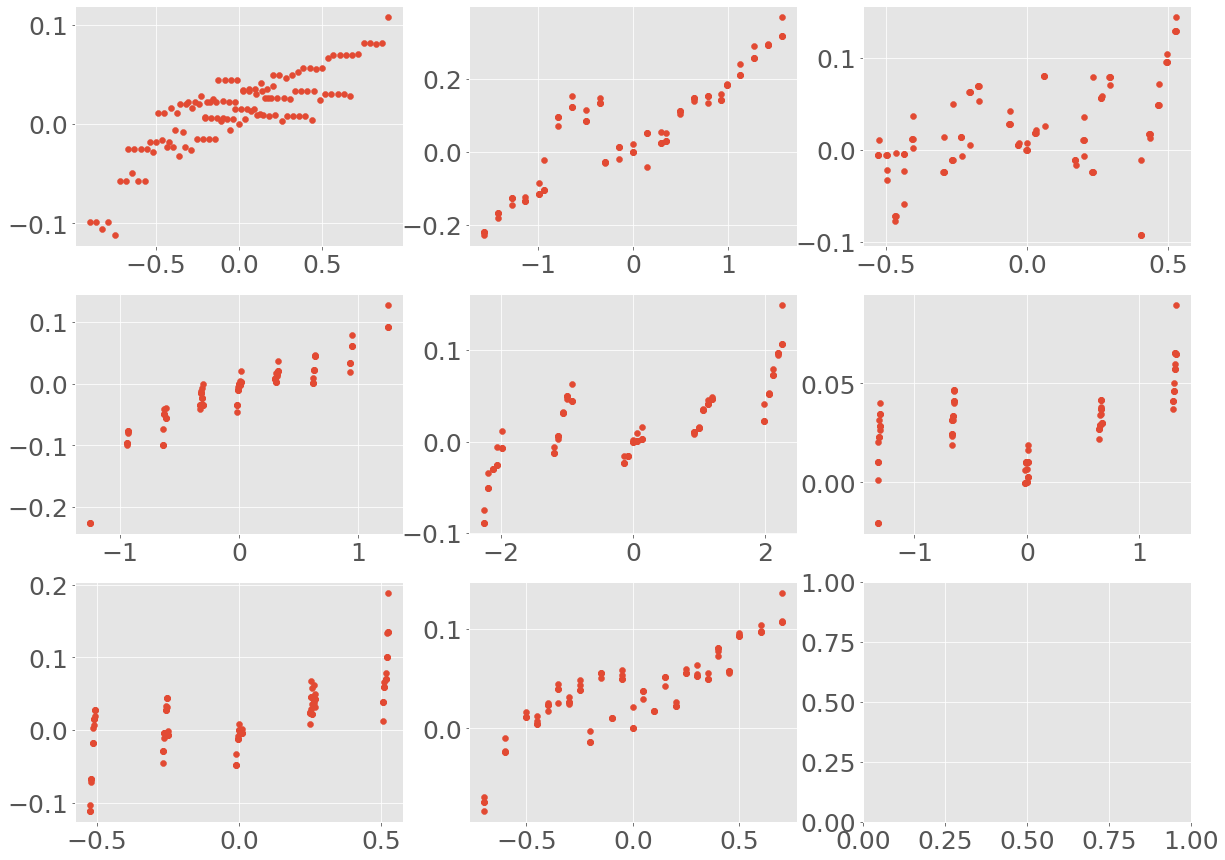

In [56]:
fig, ax = plt.subplots(3,3,figsize=(20, 15))

for i in range(3):
    for j in range(3):
        if (i,j)==(2,2):
            continue
        stats = raw_stats.copy()
        stats = stats[stats['input']  == f"/dataheart/dataset/downtown/downtown_{i*3+j+1}/part%d.mp4"]
        stats = stats[stats['second']  < 6]
        stats = stats.groupby(['qpidx','residx', 'bframebiasidx']).mean().reset_index()
        shift_idx = 62
        shifted_stats = stats.copy()
        for key in ['qpidx', 'residx', 'bframebiasidx', 'f1', 'inference_sigmoid', 'inference_sum']:
            shifted_stats[key] -= shifted_stats.iloc[62][key]

        dqp = -abs(shifted_stats[(shifted_stats.qpidx == 1) & (shifted_stats.residx == 0) & (shifted_stats.bframebiasidx == 0)].iloc[0]['inference_sigmoid'])
        dres = -abs(shifted_stats[(shifted_stats.qpidx == 0) & (shifted_stats.residx == 1) & (shifted_stats.bframebiasidx == 0)].iloc[0]['inference_sigmoid'])
        dbf = -abs(shifted_stats[(shifted_stats.qpidx == 0) & (shifted_stats.residx == 0) & (shifted_stats.bframebiasidx == 1)].iloc[0]['inference_sigmoid'])

        shifted_stats['dacc'] = shifted_stats['qpidx'] * dqp + shifted_stats['residx'] * dres + shifted_stats['bframebiasidx'] * dbf
        shifted_stats = shifted_stats[(shifted_stats.qpidx.abs() <= 2) & (shifted_stats.residx.abs() <= 2) & (shifted_stats.bframebiasidx.abs() <= 2)]
        ax[i,j].scatter(shifted_stats['dacc'].tolist(), shifted_stats['f1'].tolist())

# fig.supxlabel('Inference result change')
# fig.supylabel('Accuracy change')
        # ax[i,j].set_xlabel()
        # ax[i,j].set_ylabel()

Text(0, 0.5, 'Accuracy change (abs)')

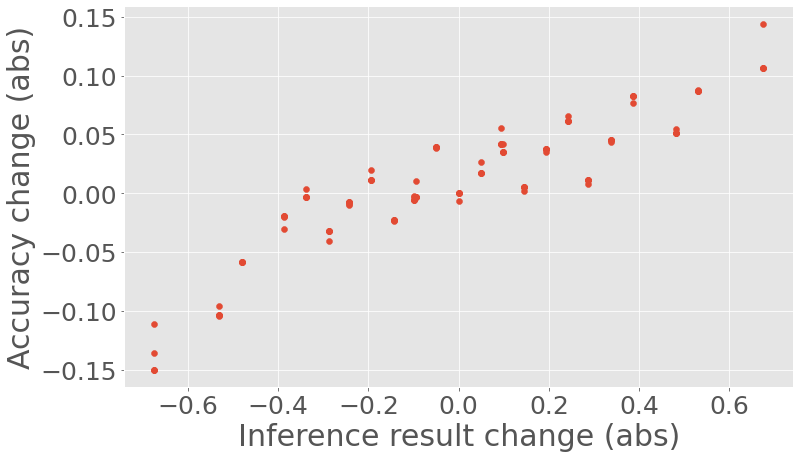

In [43]:
fig, ax = plt.subplots(figsize=(12, 7))
shifted_stats = shifted_stats[(shifted_stats.qpidx.abs() <= 2) & (shifted_stats.residx.abs() <= 2) & (shifted_stats.bframebiasidx.abs() <= 2)]
ax.scatter(shifted_stats['dacc'].tolist(), shifted_stats['f1'].tolist())
ax.set_xlabel('Inference result change (abs)')
ax.set_ylabel('Accuracy change (abs)')

Text(0.5, 0, 'Accuracy')

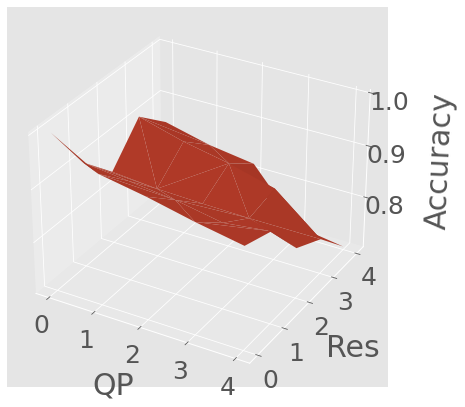

In [84]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
ax.xaxis.labelpad=20
ax.yaxis.labelpad=20
ax.zaxis.labelpad=25
surf = ax.plot_trisurf(stats['qpidx'].tolist(), stats['residx'].tolist(), stats['f1'].tolist())
ax.set_xlabel('QP')
ax.set_ylabel('Res')
ax.set_zlabel('Accuracy')

Text(0.5, 0, 'Proxy')

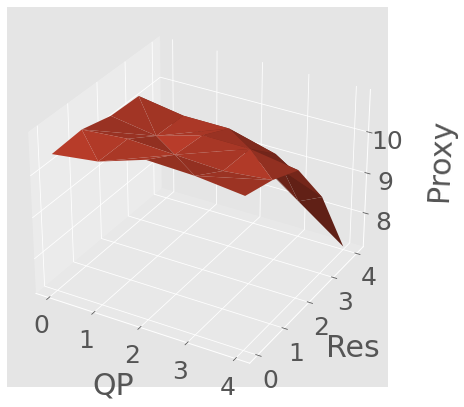

In [83]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
ax.xaxis.labelpad=20
ax.yaxis.labelpad=20
ax.zaxis.labelpad=25
surf = ax.plot_trisurf(stats['qpidx'].tolist(), stats['residx'].tolist(), [i for i in stats['inference_sigmoid'].tolist()])
ax.set_xlabel('QP')
ax.set_ylabel('Res')
ax.set_zlabel('Proxy')


In [81]:
stats['f1'].corr(stats['inference_sigmoid'])

0.7910064219119658